In [57]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords

data=pd.read_csv(r"E:/Teaching/数据挖掘与最优化/Data/labeledTrainData.tsv",header=0,delimiter="\t",nrows=1000)
data

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...
...,...,...,...
995,472_1,0,The only thing I remember about this movie are...
996,1713_8,1,This is a kind of movie that will stay with yo...
997,723_2,0,I just didn't get this movie...Was it a musica...
998,10126_2,0,Granting the budget and time constraints of se...


In [77]:
# 下载英文停用词
nltk.download("stopwords",download_dir=r"E:/nltk_data")

[nltk_data] Downloading package stopwords to E:/nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [81]:
# 英文文本预处理
def review_to_words(raw_review):
    review_text = BeautifulSoup(raw_review).get_text() #原始的评论文本中有大量的HTML标记符号，使用 BeautifulSoup的解析库对其进行清理      
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) #通过正则表达式清除掉一些标点等非字母字符
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if w not in stops]   
    return( " ".join( meaningful_words))

data["clean_review"]=data["review"].apply(review_to_words)
data

C:\Users\Liu Yang\AppData\Local\Temp\ipykernel_2960\2721918875.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review).get_text() #原始的评论文本中有大量的HTML标记符号，使用 BeautifulSoup的解析库对其进行清理


,id,sentiment,review,clean_review
0,5814_8,1,With all this stuff going down at the moment w...,stuff going moment mj started listening music ...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",classic war worlds timothy hines entertaining ...
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,film starts manager nicholas bell giving welco...
3,3630_4,0,It must be assumed that those who praised this...,must assumed praised film greatest filmed oper...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,superbly trashy wondrously unpretentious explo...
...,...,...,...,...
995,472_1,0,The only thing I remember about this movie are...,thing remember movie two things first twelve y...
996,1713_8,1,This is a kind of movie that will stay with yo...,kind movie stay long time soha ali abhay deol ...
997,723_2,0,I just didn't get this movie...Was it a musica...,get movie musical choreographed songs dancing ...
998,10126_2,0,Granting the budget and time constraints of se...,granting budget time constraints serial produc...


In [83]:
# Represent each review by a long vector with each entry being the corresponding word count
from sklearn.feature_extraction.text import CountVectorizer
  
vectorizer = CountVectorizer(max_features = 500) 
train_data_features = vectorizer.fit_transform(data.clean_review).toarray()
train_data_features[0,:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 3, 0, 0, 2, 2, 0, 1, 1, 0,
       0, 0, 0, 3, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0,

In [85]:
# Sample splitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train_data_features,data.sentiment,test_size=0.2,random_state=0)

In [87]:
# Logistic regression

from sklearn.linear_model import LogisticRegression

LR_model=LogisticRegression()
LR_model=LR_model.fit(X_train,y_train)
y_pred=LR_model.predict(X_test)

Accuracy is:  0.735
Sensitivity is:  0.711340206185567
Specificity is:  0.7572815533980582


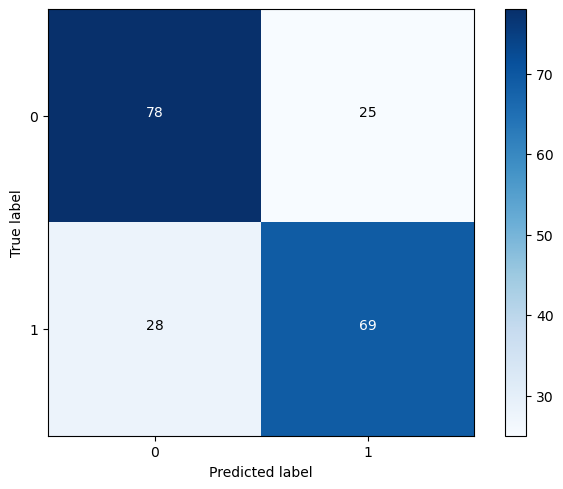

In [89]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(y_test,y_pred)

print("Accuracy is: ",(cnf_matrix[0,0]+cnf_matrix[1,1])/(cnf_matrix[0,0]+cnf_matrix[1,1]+cnf_matrix[0,1]+cnf_matrix[1,0]))
print("Sensitivity is: ",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
print("Specificity is: ",cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1]))

import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm,classes,title="Confusion matrix",cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation="nearest",cmap=cmap)
    plt.title=title
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=0)
    plt.yticks(tick_marks,classes)
    
    thresh=cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment="center",color="white" if cm[i,j]>thresh else "black")
        
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

class_names=[0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=class_names)
plt.show()

In [91]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')  #load nltk中的英文分词器,中文用Jieba分词器

def split_sentences(review):
    raw_sentences = tokenizer.tokenize(review.strip()) #句子分割
    sentences = [review_to_words(s) for s in raw_sentences if s] #清洗每个句子
    # 该函数最后返回一条review分割好的句子组成的列表
    return sentences

sentences = sum(data.review.apply(split_sentences),[]) #将Series中所有行中的句子合并为一个列表，列表每个元素即每句话

sentences

C:\Users\Liu Yang\AppData\Local\Temp\ipykernel_2960\2721918875.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review).get_text() #原始的评论文本中有大量的HTML标记符号，使用 BeautifulSoup的解析库对其进行清理


['stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker',
 'maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent',
 'moonwalker part biography part feature film remember going see cinema originally released',
 'subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring',
 'may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord',
 'wants mj dead bad beyond',
 'mj overheard plans',
 'nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence',
 'also director must patience saint came filming kiddy bad seque

In [93]:
# 将每个句子分词，构建二维列表，列表每个元素代表一个句子，句子列表每个元素代表句子中的一个词
sentences_list =[]
for line in sentences:
    sentences_list.append(nltk.word_tokenize(line))
sentences_list

[['stuff',
  'going',
  'moment',
  'mj',
  'started',
  'listening',
  'music',
  'watching',
  'odd',
  'documentary',
  'watched',
  'wiz',
  'watched',
  'moonwalker'],
 ['maybe',
  'want',
  'get',
  'certain',
  'insight',
  'guy',
  'thought',
  'really',
  'cool',
  'eighties',
  'maybe',
  'make',
  'mind',
  'whether',
  'guilty',
  'innocent'],
 ['moonwalker',
  'part',
  'biography',
  'part',
  'feature',
  'film',
  'remember',
  'going',
  'see',
  'cinema',
  'originally',
  'released'],
 ['subtle',
  'messages',
  'mj',
  'feeling',
  'towards',
  'press',
  'also',
  'obvious',
  'message',
  'drugs',
  'bad',
  'kay',
  'visually',
  'impressive',
  'course',
  'michael',
  'jackson',
  'unless',
  'remotely',
  'like',
  'mj',
  'anyway',
  'going',
  'hate',
  'find',
  'boring'],
 ['may',
  'call',
  'mj',
  'egotist',
  'consenting',
  'making',
  'movie',
  'mj',
  'fans',
  'would',
  'say',
  'made',
  'fans',
  'true',
  'really',
  'nice',
  'actual',
  'fea

In [95]:
# 设定词向量训练的参数
num_features = 300    # Word vector dimensionality
min_word_count = 40   # Minimum word count
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size

from gensim.models import Word2Vec

model = Word2Vec(sentences_list,workers=num_workers,vector_size=num_features,min_count=min_word_count,window=context)
model.init_sims(replace=True)

print(model.wv.similarity("boy","girl"))
print(model.wv.doesnt_match(["man","woman","child","kitchen"]))
print(model.wv.most_similar("boy"))

0.99960035
child
[('death', 0.9996035695075989), ('girl', 0.999600350856781), ('production', 0.9995896816253662), ('small', 0.9995893239974976), ('behind', 0.9995852708816528), ('audience', 0.9995837211608887), ('little', 0.999581515789032), ('body', 0.9995776414871216), ('works', 0.999575138092041), ('father', 0.9995666146278381)]


C:\Users\Liu Yang\AppData\Local\Temp\ipykernel_2960\112126492.py:10: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  model.init_sims(replace=True)


In [97]:
# 将每条review中的词转化为词向量，并将所有词向量相加作为review的向量化表示
def to_review_vector(review):
    global word_vec
    
    review=review_to_words(review)
    word_vec=np.zeros((1,300))
    for word in review:
        if word in model.wv:
            word_vec+=np.array(model.wv[word])
    return pd.Series(word_vec.mean(axis=0))

train_data_features=data.review.apply(to_review_vector)
train_data_features

C:\Users\Liu Yang\AppData\Local\Temp\ipykernel_2960\2721918875.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review).get_text() #原始的评论文本中有大量的HTML标记符号，使用 BeautifulSoup的解析库对其进行清理


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.028920,1.989703,-0.285609,0.868537,-0.055925,-2.037751,0.276682,3.728363,0.253589,-1.015878,...,-0.547976,2.219300,0.793639,-0.716872,1.967496,2.712422,0.144210,-1.359723,1.061418,-0.496731
1,0.011568,0.795881,-0.114243,0.347415,-0.022370,-0.815100,0.110673,1.491345,0.101436,-0.406351,...,-0.219191,0.887720,0.317456,-0.286749,0.786998,1.084969,0.057684,-0.543889,0.424567,-0.198692
2,0.037596,2.586614,-0.371291,1.129098,-0.072702,-2.649077,0.359687,4.846872,0.329666,-1.320642,...,-0.712369,2.885090,1.031731,-0.931934,2.557744,3.526149,0.187473,-1.767640,1.379844,-0.645750
3,0.027474,1.890218,-0.271328,0.825110,-0.053128,-1.935864,0.262848,3.541945,0.240910,-0.965084,...,-0.520578,2.108335,0.753957,-0.681029,1.869121,2.576801,0.137000,-1.291737,1.008347,-0.471894
4,0.036150,2.487129,-0.357011,1.085671,-0.069906,-2.547189,0.345853,4.660454,0.316987,-1.269848,...,-0.684971,2.774125,0.992049,-0.896090,2.459370,3.390528,0.180263,-1.699654,1.326773,-0.620913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.007230,0.497426,-0.071402,0.217134,-0.013981,-0.509438,0.069171,0.932091,0.063397,-0.253970,...,-0.136994,0.554825,0.198410,-0.179218,0.491874,0.678106,0.036053,-0.339931,0.265355,-0.124183
996,0.011568,0.795881,-0.114243,0.347415,-0.022370,-0.815100,0.110673,1.491345,0.101436,-0.406351,...,-0.219191,0.887720,0.317456,-0.286749,0.786998,1.084969,0.057684,-0.543889,0.424567,-0.198692
997,0.002892,0.198970,-0.028561,0.086854,-0.005592,-0.203775,0.027668,0.372836,0.025359,-0.101588,...,-0.054798,0.221930,0.079364,-0.071687,0.196750,0.271242,0.014421,-0.135972,0.106142,-0.049673
998,0.066516,4.576317,-0.656900,1.997635,-0.128627,-4.686828,0.636369,8.575235,0.583255,-2.336520,...,-1.260346,5.104390,1.825370,-1.648806,4.525240,6.238571,0.331684,-3.127363,2.441262,-1.142481


In [99]:
X_train,X_test,y_train,y_test=train_test_split(train_data_features,data.sentiment,test_size=0.2,random_state=0)
LR_model=LR_model.fit(X_train,y_train)
y_pred=LR_model.predict(X_test)

Accuracy is:  0.515
Sensitivity is:  0.0
Specificity is:  1.0


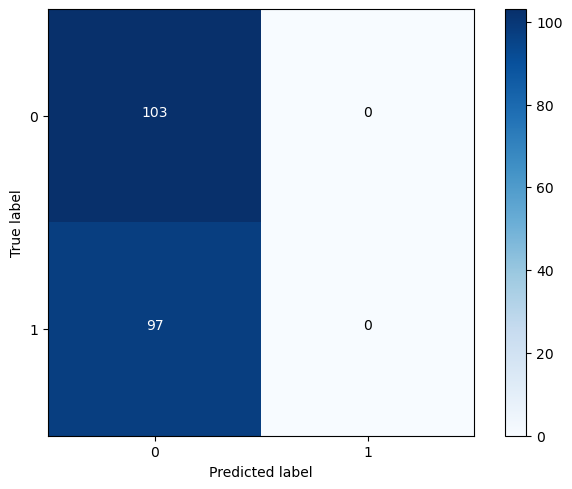

In [101]:
cnf_matrix=confusion_matrix(y_test,y_pred)
print("Accuracy is: ",(cnf_matrix[0,0]+cnf_matrix[1,1])/(cnf_matrix[0,0]+cnf_matrix[1,1]+cnf_matrix[0,1]+cnf_matrix[1,0]))
print("Sensitivity is: ",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
print("Specificity is: ",cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1]))
class_names=[0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=class_names)
plt.show()

In [103]:
# Doc2Vec的训练数据集必须是TaggedDocument格式
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

# train_corpus每个元素代表一条review
train_corpus = [TaggedDocument(words=word_tokenize(d), tags=[str(i)]) for i, d in enumerate(data.clean_review)]
train_corpus

[TaggedDocument(words=['stuff', 'going', 'moment', 'mj', 'started', 'listening', 'music', 'watching', 'odd', 'documentary', 'watched', 'wiz', 'watched', 'moonwalker', 'maybe', 'want', 'get', 'certain', 'insight', 'guy', 'thought', 'really', 'cool', 'eighties', 'maybe', 'make', 'mind', 'whether', 'guilty', 'innocent', 'moonwalker', 'part', 'biography', 'part', 'feature', 'film', 'remember', 'going', 'see', 'cinema', 'originally', 'released', 'subtle', 'messages', 'mj', 'feeling', 'towards', 'press', 'also', 'obvious', 'message', 'drugs', 'bad', 'kay', 'visually', 'impressive', 'course', 'michael', 'jackson', 'unless', 'remotely', 'like', 'mj', 'anyway', 'going', 'hate', 'find', 'boring', 'may', 'call', 'mj', 'egotist', 'consenting', 'making', 'movie', 'mj', 'fans', 'would', 'say', 'made', 'fans', 'true', 'really', 'nice', 'actual', 'feature', 'film', 'bit', 'finally', 'starts', 'minutes', 'excluding', 'smooth', 'criminal', 'sequence', 'joe', 'pesci', 'convincing', 'psychopathic', 'power

In [105]:
model = Doc2Vec(vector_size=300, window=5, dm=1, min_count=1, alpha=0.025)
model.build_vocab(train_corpus)

# 与第一条review最相似的top 5 review
print(model.dv.most_similar([model.infer_vector(train_corpus[0].words)], topn=5))

[('320', 0.19451305270195007), ('632', 0.18984991312026978), ('404', 0.1835634410381317), ('834', 0.16859044134616852), ('819', 0.16084229946136475)]


In [109]:
# 构建训练数据，其中每一行为每条review对应的句子向量
train_data_features=[]
for i in np.arange(len(train_corpus)):
    train_data_features.append(model.infer_vector(train_corpus[i].words))
    
train_data_features=pd.DataFrame(train_data_features)
train_data_features.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.001565,-0.000084,-0.001119,0.001394,0.001641,0.000068,-0.000219,-0.000749,0.000163,0.001439,...,-0.000865,0.000502,0.000600,0.000537,0.000087,0.001058,-0.001463,0.000152,-0.000714,-0.001217
1,-0.000148,0.001117,0.001236,0.001216,0.000973,-0.001373,0.000904,-0.001509,-0.000287,-0.000209,...,0.000296,0.000896,-0.000983,-0.000211,-0.001098,0.000442,-0.001281,-0.001561,-0.000636,0.000631
2,0.000539,0.001293,0.001615,-0.000842,-0.000299,0.000170,0.001049,-0.000031,-0.001031,0.000686,...,-0.000149,0.000875,-0.001477,0.000312,-0.000655,0.001500,0.000911,0.001416,0.000716,0.000927
3,0.000574,0.001395,-0.001558,-0.001577,0.001625,-0.000803,-0.001440,0.000994,0.001050,0.000201,...,-0.001614,-0.001388,-0.000363,-0.001254,0.000885,-0.001580,0.000146,-0.001440,-0.000377,-0.001596
4,0.000260,0.001629,-0.000033,0.000552,-0.000467,0.001172,-0.001463,0.000883,-0.000357,0.000853,...,0.000924,-0.001206,0.001454,-0.000327,0.001279,-0.000455,-0.000136,-0.001193,0.000666,0.001185


Accuracy is:  0.515
Sensitivity is:  0.0
Specificity is:  1.0


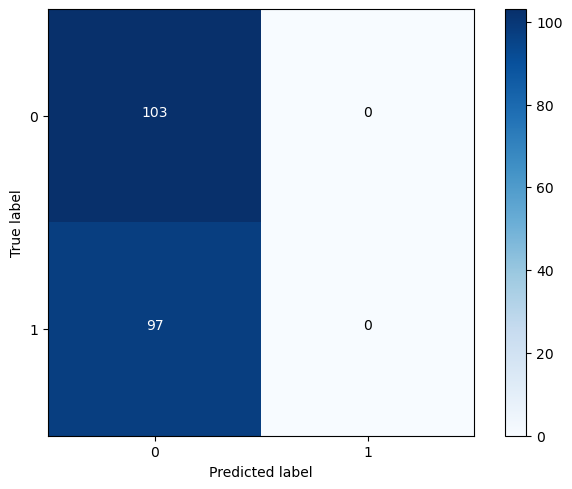

In [111]:
X_train,X_test,y_train,y_test=train_test_split(train_data_features,data.sentiment,test_size=0.2,random_state=0)
LR_model=LR_model.fit(X_train,y_train)
y_pred=LR_model.predict(X_test)
cnf_matrix=confusion_matrix(y_test,y_pred)
print("Accuracy is: ",(cnf_matrix[0,0]+cnf_matrix[1,1])/(cnf_matrix[0,0]+cnf_matrix[1,1]+cnf_matrix[0,1]+cnf_matrix[1,0]))
print("Sensitivity is: ",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
print("Specificity is: ",cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1]))
class_names=[0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=class_names)
plt.show()